Importing necessarry libraries 

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression, LogisticRegression

Importing the dataset 

In [12]:
csv_file="/Users/user/Downloads/Housing_Price_Data.csv"
dataset=pd.read_csv(csv_file)

In [13]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: ylabel='bedrooms'>

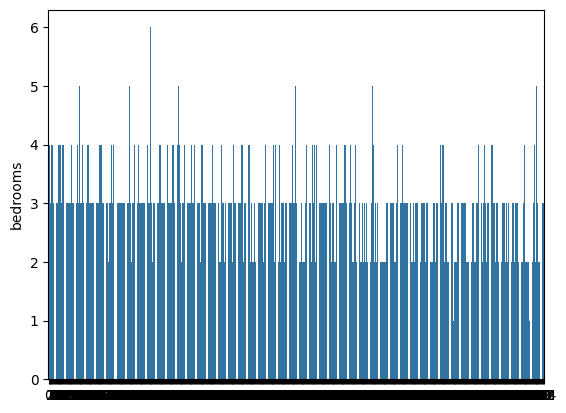

In [15]:
sns.barplot(dataset['bedrooms'])

In [16]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Treating outliers 

In [18]:
dataset['area'].quantile(0.90)

7980.0

In [19]:
min_threshold,max_threshold=dataset['area'].quantile([0.01,0.90])

In [20]:
dataset=dataset[(dataset.area<max_threshold) & (dataset.area>min_threshold)]

In [21]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,4.830000e+02,483.000000,483.000000,483.000000,483.000000,483.000000
mean,4.630796e+06,4662.641822,2.946170,1.275362,1.809524,0.616977
std,1.765631e+06,1453.249850,0.735299,0.478537,0.852719,0.825100
min,1.750000e+06,2000.000000,1.000000,1.000000,1.000000,0.000000
25%,3.395000e+06,3511.000000,2.000000,1.000000,1.000000,0.000000
50%,4.200000e+06,4360.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6000.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,7950.000000,6.000000,3.000000,4.000000,3.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x13350d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x133638c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13350d670>],
 'medians': [<matplotlib.lines.Line2D at 0x133665a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x133666390>],
 'means': []}

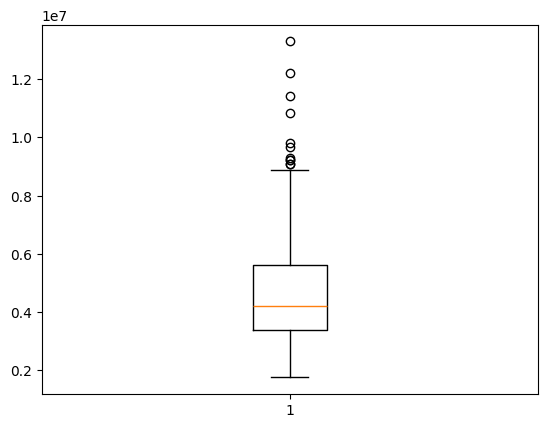

In [22]:

plt.boxplot(dataset['price'])

In [23]:
dataset['price'].quantile([0.10])

0.1    2800000.0
Name: price, dtype: float64

In [24]:
min_threshold_p,max_threshold_p=dataset['price'].quantile([0.10,0.95])


In [25]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


Commencement of feature engineering 

In [26]:
from sklearn.preprocessing import OrdinalEncoder
ore=OrdinalEncoder()
for  column in dataset.columns:
    if dataset[column].dtype=='object':
        dataset[column]=ore.fit_transform(dataset[[column]]).ravel()

In [27]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
5,10850000,7500,3,3,1,1.0,0.0,1.0,0.0,1.0,2,1.0,1.0
9,9800000,5750,3,2,4,1.0,1.0,0.0,0.0,1.0,1,1.0,2.0


In [28]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [29]:
x=dataset.drop(['prefarea'],axis=1)
y=dataset['prefarea']

Treating data imbalance 

In [30]:
target_imbalance=y.value_counts()
target_imbalance

prefarea
0.0    376
1.0    107
Name: count, dtype: int64

<Axes: xlabel='prefarea', ylabel='count'>

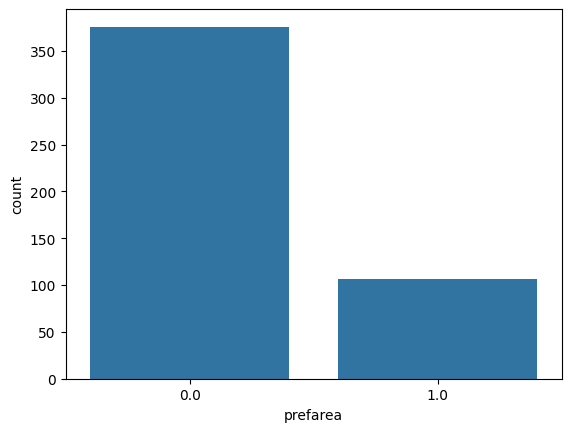

In [31]:
#visualizing the target value 
sns.barplot(target_imbalance)

In [32]:
from imblearn.over_sampling import RandomOverSampler
res=RandomOverSampler(sampling_strategy=1)
x,y=res.fit_resample(x,y)

In [33]:
target_imbalance=y.value_counts()
target_imbalance

prefarea
1.0    376
0.0    376
Name: count, dtype: int64

Splitting and scaling our data 

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [35]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)


In [59]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    return y_pred

Implementing the KFold splitting technique

In [37]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)

Identifying the best fitting algorithm 

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
score_tree=[]
score_rand=[]
score_svm=[]
score_neigh=[]

for train_index,test_index in kf.split(x):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    score_tree.append((get_score(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)))
    score_rand.append((get_score(RandomForestClassifier(n_estimators=100,min_samples_split=2),x_train,x_test,y_train,y_test)))
    score_svm.append((get_score(SVC(),x_train,x_test,y_train,y_test)))
    score_neigh.append((get_score(KNeighborsClassifier(),x_train,x_test,y_train,y_test)))
    
    

In [66]:
score_rand

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.]),
 array([1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1.

In [102]:
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
metrics.accuracy_score(pred,y_test)

1.0

Implementation of feature selection using highest correlated features 

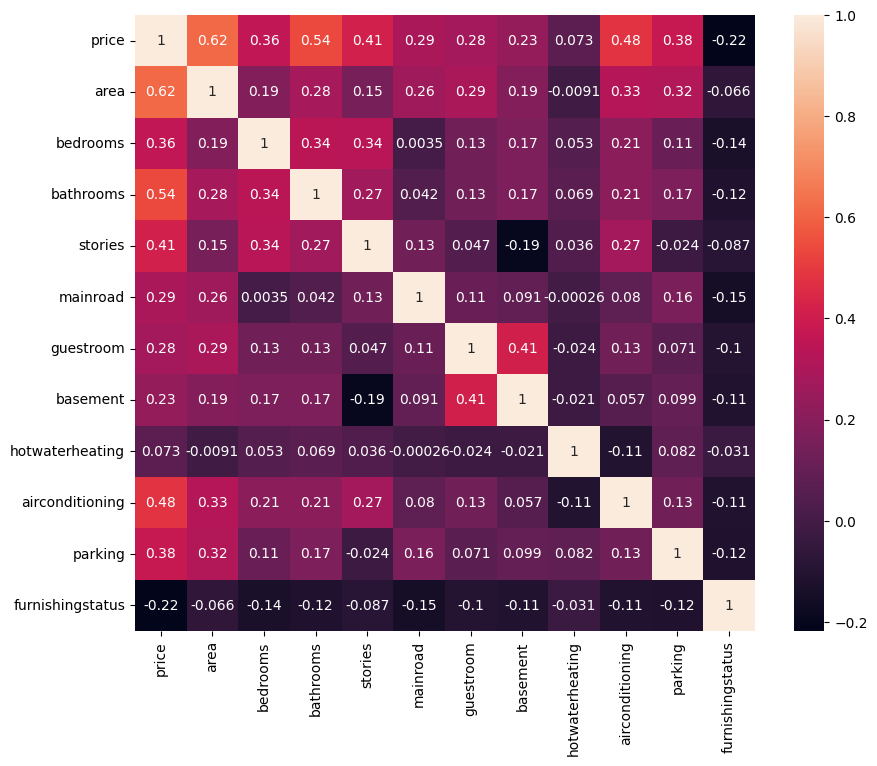

In [41]:
plt.figure(figsize=(10,8))
cor=x_train.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [42]:
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [43]:
corr_features=correlation(x_train , 0.4)
len(set(corr_features))

5

In [44]:
corr_features

{'airconditioning', 'area', 'basement', 'bathrooms', 'stories'}

Dropping highly correlated features 

In [45]:
x_train.drop(['airconditioning', 'area', 'basement', 'bathrooms'],axis=1)
x_test.drop(['airconditioning', 'area', 'basement', 'bathrooms'],axis=1)


,price,bedrooms,stories,mainroad,guestroom,hotwaterheating,parking,furnishingstatus
602,4620000,2,2,1.0,1.0,0.0,0,1.0
603,13300000,4,3,1.0,0.0,0.0,2,0.0
604,5565000,5,2,1.0,1.0,0.0,0,0.0
605,3850000,2,2,1.0,1.0,0.0,0,1.0
606,5250000,3,2,1.0,1.0,0.0,1,2.0
...,...,...,...,...,...,...,...,...
747,4543000,4,2,1.0,1.0,0.0,0,0.0
748,6650000,3,3,1.0,0.0,0.0,0,0.0
749,3332000,3,2,1.0,0.0,0.0,0,0.0
750,4830000,3,1,1.0,0.0,0.0,2,1.0


Implementation of Gridsearch for hyperparameter tuning 

In [46]:
fore=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters = [{
    'n_estimators': [10, 100, 200],
    'max_depth': [3, 5, 10, None],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3]
}]
gridsearch=GridSearchCV(
    estimator=fore,
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)
gridsearch=gridsearch.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.

In [47]:
accuracy=gridsearch.best_score_
accuracy

0.8094214876033059

In [48]:
param=gridsearch.best_params_
param

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

using best fitted parameters to train the model 

In [107]:
rand=RandomForestClassifier(max_depth=None,max_features=1,min_samples_leaf=1,min_samples_split=2,n_estimators=10)
rand.fit(x_train,y_train)
ppd=rand.predict(x_test)
metrics.accuracy_score(ppd,y_test)

0.9666666666666667

Implementation of learning curve to study model performance 

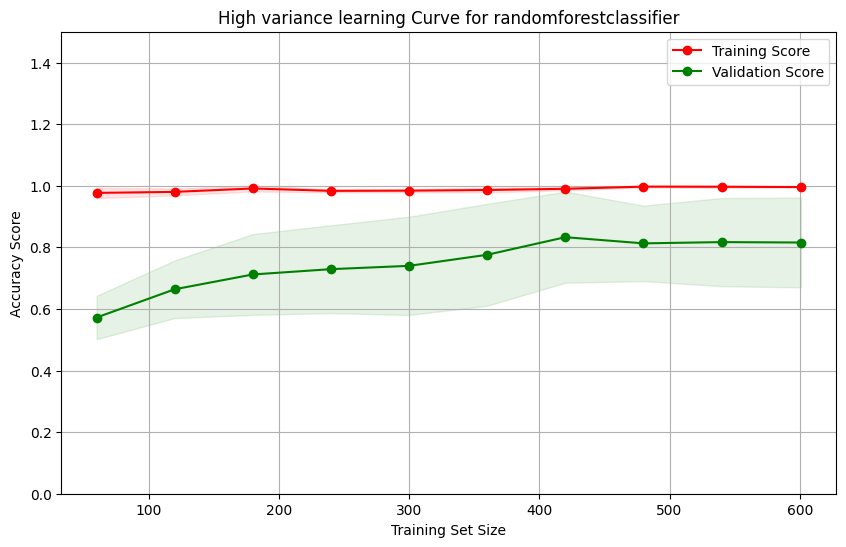

In [108]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    rand
    , x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("High variance learning Curve for randomforestclassifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean,'o-', label="Training Score", color="r")
plt.plot(train_sizes, test_scores_mean,'o-', label="Validation Score", color="g")

plt.ylim(0, 1.5)
plt.legend()
plt.show()
